In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problema 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

In [2]:
def euler(f, x0, y0, xf, h):
        

    n = int(abs(xf - x0)/h) # nodos

    x = np.zeros(n+1) # Almacena nodos
    y = np.zeros((n+1, len(y0))) # almacena soluciones 

    # Condicion inicial
    x[0] = x0
    y[0] = y0

    for i in range(n):

        x[i+1] = x[i] + h
        y[i+1] = y[i] + h*f(x[i], y[i])

    return x, y

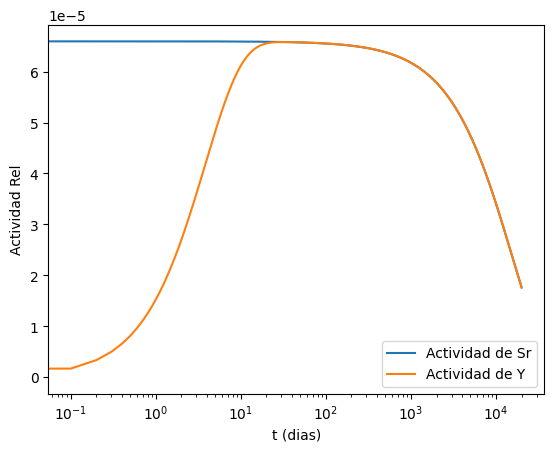

In [3]:
# vidas medias
vSr = 28.78 * 365.25 # dias
vY = 2.67 #dias

# lambdas
lambda_Sr = np.log(2)/vSr
lambda_Y = np.log(2)/vY

#ecuacion
def dN(t, N):
    Nsr, Ny = N
    dNsr = -lambda_Sr*Nsr
    dNy = -lambda_Y*Ny - dNsr
    return np.array([dNsr, dNy])

#condiciones iniciales
t0, tf = 0, 20000.
N = np.array([1, 0], dtype= float) #Nsr, Ny
h = 0.1

t, Nt = euler(dN, t0, N, tf, h)

A_Sr = lambda_Sr*Nt[:, 0]
A_Y = lambda_Y*Nt[:, 1]

plt.semilogx(t, A_Sr, label= 'Actividad de Sr')
plt.semilogx(t, A_Y, label= 'Actividad de Y')

plt.xlabel('t (dias)')
plt.ylabel('Actividad Rel')

plt.legend()

# Problema 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

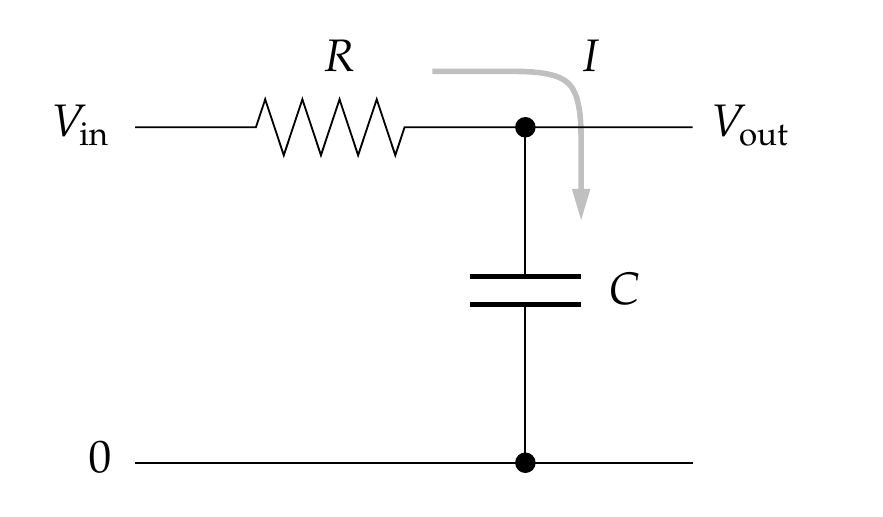

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

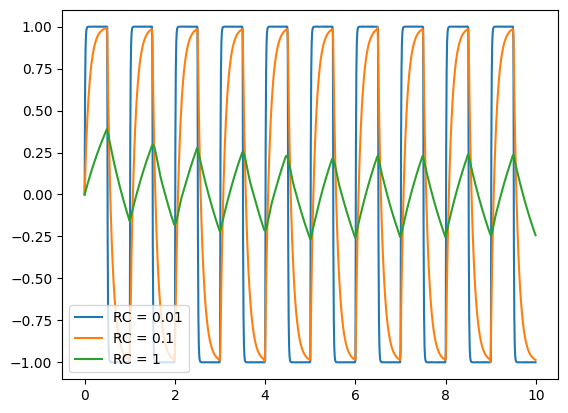

In [4]:
def Vin(t):
    if np.floor(2*t)%2 == 0:
        return 1
    else:
        return -1

f = lambda t, v: 1/RC * (Vin(t) - v)
v0 = 0
t0 = 0
tf = 10

h = 0.01

t_eval = np.arange(t0, tf, h)

for RC in [0.01, 0.1, 1]:
    sol = solve_ivp(f, (t0, tf), [v0], t_eval= t_eval)
    t = sol.t
    v = sol.y[0]
    plt.plot(t, v, label= f'RC = {RC}')

plt.legend()

# Problema 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

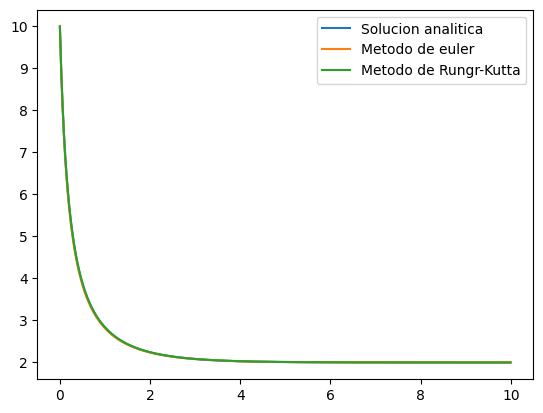

In [5]:
def my_logistic_eq(t, P, r=1, K=2):
    return r*P*(1 - P/K)

def Pt(t, P0, r=1, K=2):
    return (K*P0*np.exp(r*t))/(K + P0*(np.exp(r*t) - 1))

t0 = 0
tf = 10
P0 = 10
h = 0.01

t_eval = np.arange(t0, tf, h)

t, sol_Euler = euler(my_logistic_eq, t0, [P0], tf, h)
sol_RK4 = solve_ivp(my_logistic_eq, (t0, tf), [P0], t_eval= t_eval)
sol_analitica = Pt(t_eval, P0)

plt.plot(t_eval, sol_analitica, label= 'Solucion analitica')
plt.plot(t, sol_Euler, label= 'Metodo de euler')
plt.plot(sol_RK4.t, sol_RK4.y[0], label= 'Metodo de Rungr-Kutta')

plt.legend()

# Problema 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

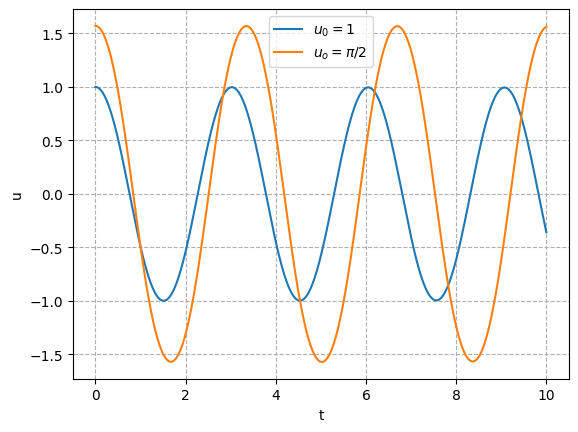

In [6]:
g = 9.8 #m/s^2
l = 2.  #m


def f(t, U):
    dUdt = np.zeros_like(U, dtype= float)

    dUdt[0] = U[1]
    dUdt[1] = -g/l * np.sin(U[0])

    return dUdt

t0, tf = 0, 10
U0_1 = np.array([1, 0])
U0_2 = np.array([np.pi/2, 0])

h = 0.001
t = np.arange(t0, tf+h, h)

sol_U0_1 = solve_ivp(f, (t0, tf), U0_1, t_eval= t)
ut0_1 = sol_U0_1.y[0]

sol_U0_2 = solve_ivp(f, (t0, tf), U0_2, t_eval= np.arange(t0, tf+h, h))
ut0_2 = sol_U0_2.y[0]

plt.plot(t, ut0_1, label= '$u_0 = 1$')
plt.plot(t, ut0_2, label= '$u_o = \\pi/2$')

plt.xlabel('t')
plt.ylabel('u')
plt.grid(ls= '--')
plt.legend()

In [7]:
from scipy.interpolate import CubicSpline
from scipy.optimize import newton #Funcion para encontrar oos ceros de u(t), la distancia entre t = 0 y la primera raiz hay 1/4 del periodo

ut_1 = CubicSpline(t, ut0_1, bc_type= 'natural')
ut_2 = CubicSpline(t, ut0_2, bc_type= 'natural')

#para u0 = 1
t_1 = newton(ut_1, 0.2)
T_u0_1 = 4*t_1

#para u0 = pi/2
t_2 = newton(ut_2, 0.2)
T_u0_2 = 4*t_2

T_u0_1, T_u0_2

(np.float64(3.0259167054874077), np.float64(3.3518032392809074))

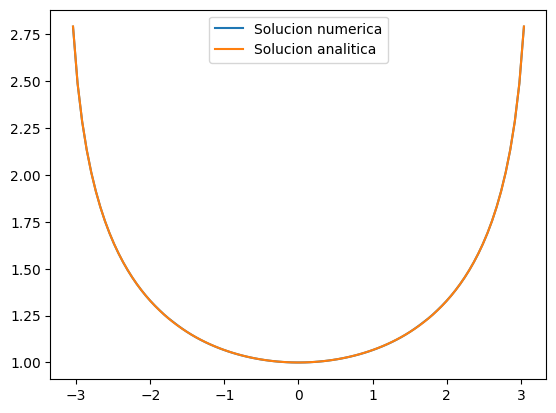

In [8]:
#T/T0 numerico
u0 = np.linspace(-np.pi+0.1, np.pi-0.1, 100)
T0 = np.sqrt(l/g)*2*np.pi

def T(u0):
    t0, tf = 0, 10
    h = 0.001
    t = np.arange(t0, tf+h, h)

    Ut = np.array([u0, 0])

    sol = solve_ivp(f, (t0, tf), Ut, t_eval= t)

    ut = CubicSpline(sol.t, sol.y[0], bc_type= 'natural')

    u = 4*newton(ut, 1)

    return u


Ti = np.zeros_like(u0)

for u in range(len(u0)):
    Ti[u] = T(u0[u])

razon = Ti/T0

#T/T0 analitica

f_int = lambda z, a: 1/np.sqrt((1-z**2)*(1-a*z**2))

K = lambda a: quad(f_int, 0, 1, args= (a))[0]

a = np.sin(u0/2)**2

razon_analitica = np.zeros_like(a)

for i in range(len(a)):
    razon_analitica[i] = 2/np.pi * K(a[i])
    
plt.plot(u0, razon, label= 'Solucion numerica')
plt.plot(u0, razon_analitica, label= 'Solucion analitica')

plt.legend()

# Probelma 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

In [9]:
alpha = 0.8
beta = 0.04
gamma = 0.3
delta = 0.01

def d_Poblacion(t, P): #P = (x, y) => poblacion 
    c, z = P #c = conejos, z = zorros
    ct = alpha*c -beta*c*z 
    zt = -gamma*z +delta*c*z

    return np.array([ct, zt])

t0, tf = 0, 50
P0 = np.array([50, 20])
h = 0.1

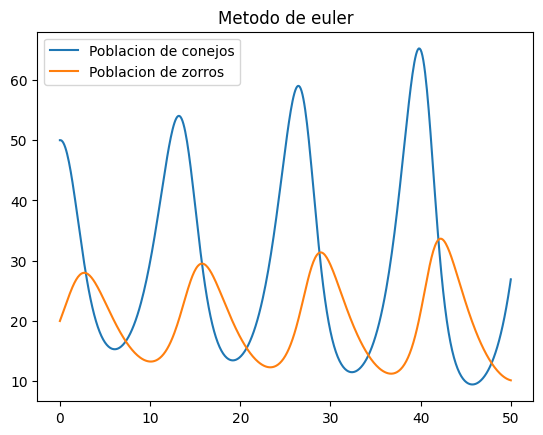

In [10]:
#a)
t_euler, Poblacion = euler(d_Poblacion, t0, P0, tf, h)

plt.plot(t_euler, Poblacion, label= ['Poblacion de conejos', 'Poblacion de zorros'])

plt.title('Metodo de euler')
plt.legend()

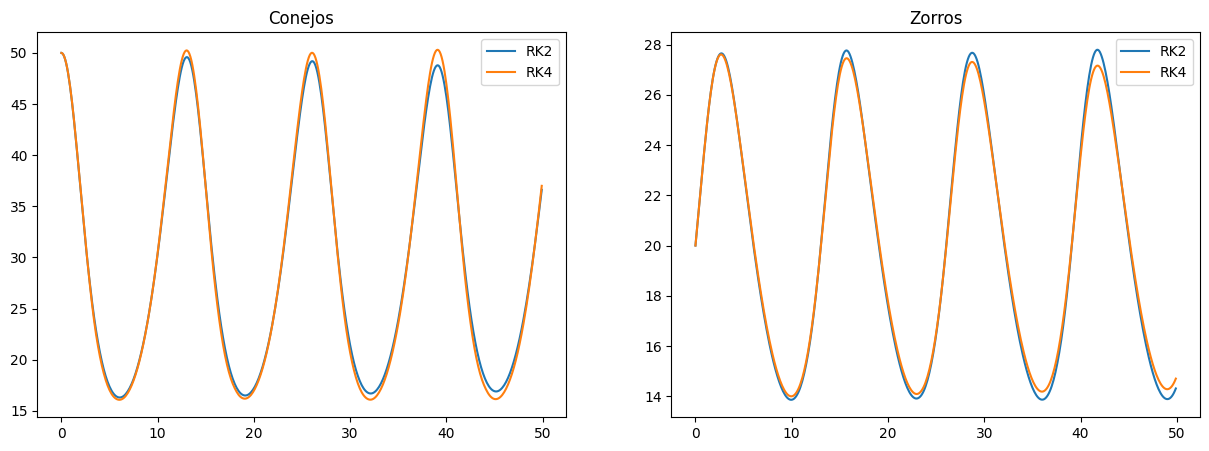

In [11]:
#b)

sol_RK2 = solve_ivp(d_Poblacion, (t0, tf), P0, t_eval= np.arange(t0, tf, h), method= 'RK23')
sol_RK4 = solve_ivp(d_Poblacion, (t0, tf), P0, t_eval= np.arange(t0, tf, h))

t_RK2 = sol_RK2.t
conejos_RK2 = sol_RK2.y[0]
zorros_RK2 = sol_RK2.y[1]

t_RK4 = sol_RK4.t
conejos_RK4 = sol_RK4.y[0]
zorros_RK4 = sol_RK4.y[1]

fig, ax = plt.subplots(1, 2, figsize= (15,5))

# conejos
ax[0].plot(t_RK2, conejos_RK2, label= 'RK2')
ax[0].plot(t_RK4, conejos_RK4, label= 'RK4')

ax[0].set_title('Conejos')
ax[0].legend()

# Zorros
ax[1].plot(t_RK4, zorros_RK4, label= 'RK2')
ax[1].plot(t_RK2, zorros_RK2, label= 'RK4')

ax[1].set_title('Zorros')
ax[1].legend()

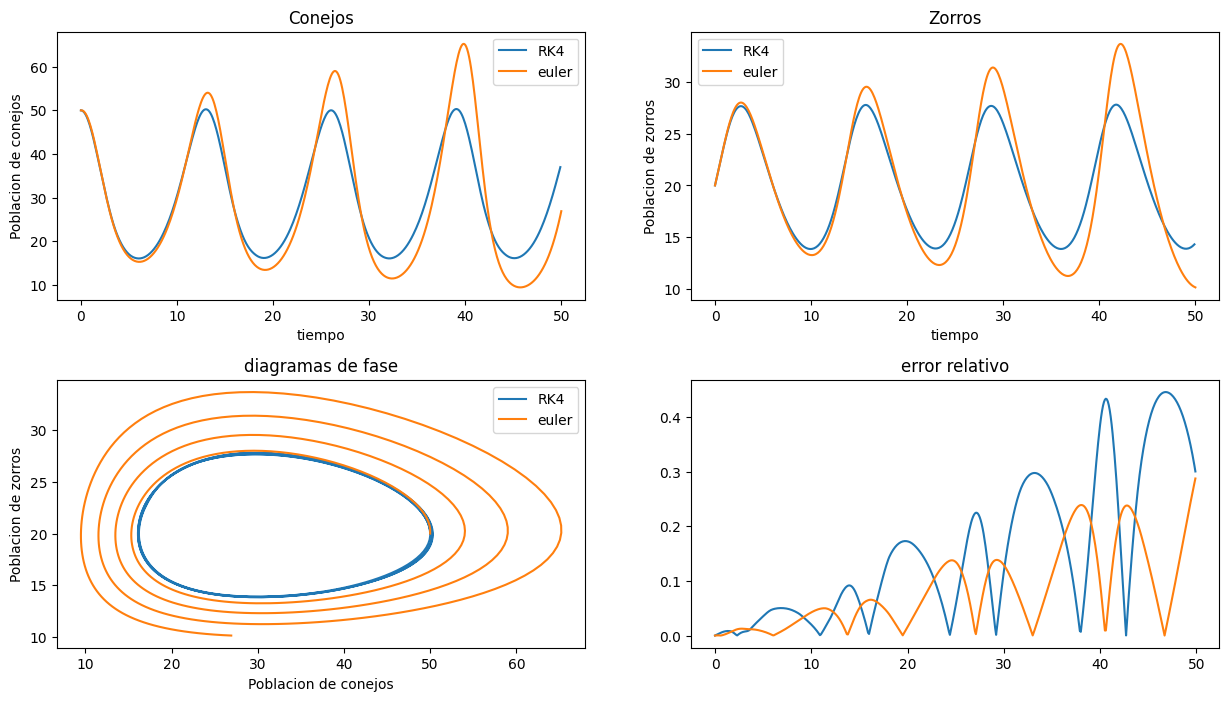

In [12]:
#c)

conejos_rel = abs(Poblacion[:len(conejos_RK4),0]-conejos_RK4)/conejos_RK4
zorros_rel = abs(Poblacion[:len(conejos_RK4),1]-zorros_RK4)/zorros_RK4

fig, ax = plt.subplots(2, 2, figsize= (15, 8))
fig.subplots_adjust(hspace= 0.3, wspace=0.2)

#Poblacion de conejos
ax[0,0].set_title('Conejos')

ax[0,0].plot(t_RK4, conejos_RK4, label= 'RK4')
ax[0,0].plot(t_euler, Poblacion[:,0], label= 'euler')

ax[0,0].set_xlabel('tiempo')
ax[0,0].set_ylabel('Poblacion de conejos')

ax[0,0].legend()

#Poblacion de zorros
ax[0,1].set_title('Zorros')

ax[0,1].plot(t_RK4, zorros_RK4, label= 'RK4')
ax[0,1].plot(t_euler, Poblacion[:,1], label= 'euler')

ax[0,1].set_xlabel('tiempo')
ax[0,1].set_ylabel('Poblacion de zorros')

ax[0,1].legend()

#Diagrama de fase
ax[1,0].set_title('diagramas de fase')

ax[1,0].plot(conejos_RK4, zorros_RK4, label= 'RK4')
ax[1,0].plot(Poblacion[:,0], Poblacion[:,1], label= 'euler')

ax[1,0].set_xlabel('Poblacion de conejos')
ax[1,0].set_ylabel('Poblacion de zorros')

ax[1,0].legend()

#Error relativo
ax[1, 1].set_title('error relativo')

ax[1, 1].plot(t_RK4, conejos_rel, label= 'conejos')
ax[1, 1].plot(t_RK4, zorros_rel, label= 'zorros')

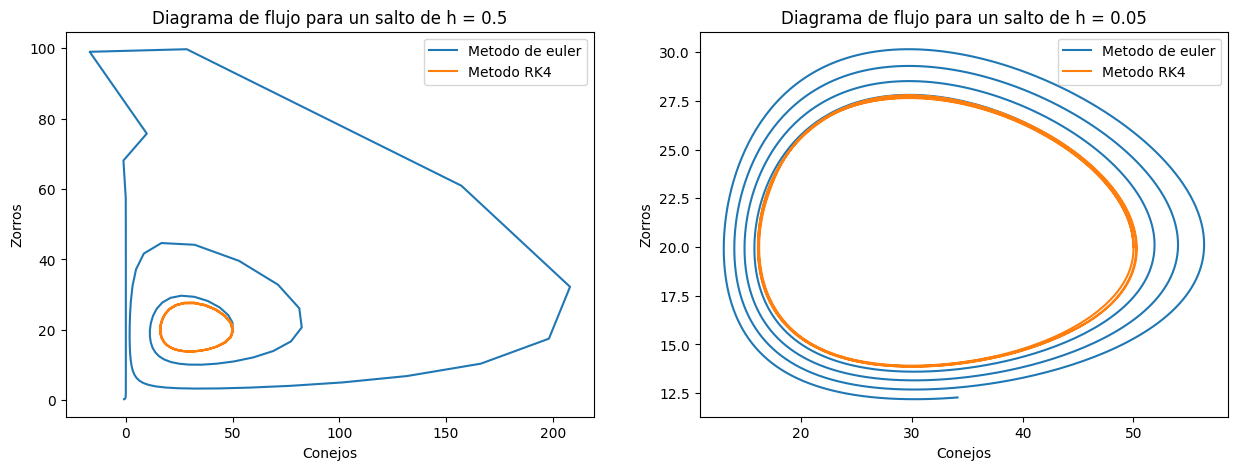

In [13]:
#D
t0, tf = 0, 50
P0 = np.array([50, 20])
h_vals = np.array([0.5, 0.05])

fig, ax = plt.subplots(1, 2, figsize= (15,5))

for i, h in enumerate(h_vals):
    Poblacion_Euler = euler(d_Poblacion, t0, P0, tf, h)[1]
    Poblacion_RK4 = solve_ivp(d_Poblacion, (t0, tf), P0, t_eval= np.arange(t0, tf, h)).y

    ax[i].set_title(f'Diagrama de flujo para un salto de h = {h}')

    ax[i].plot(Poblacion_Euler[:, 0], Poblacion_Euler[:, 1], label= 'Metodo de euler')
    ax[i].plot(Poblacion_RK4[0], Poblacion_RK4[1], label= 'Metodo RK4')

    ax[i].set_xlabel('Conejos')
    ax[i].set_ylabel('Zorros')

    ax[i].legend()


e) los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ significan:

- $\alpha$ (tasa de reproducción de los conejos)
- $\beta$ (tasa de depredación de conejos por zorros)
- $\gamma$ (tasa de mortalidad natural de los zorros)
- $\delta$ (eficiencia de conversión de presas consumidas en nuevos depredadores)

esto es, entonces, si $\alpha$ o $\delta$ aumentan, la poblacion de conejos o zorros aumentan respectivamente, si $\beta$ o $\delta$ aumentan, la poblacion de conejos y de zorros disminuye, y viceversa.

Veamos que pasa si variamos la eficioencia en la conversion de presas a nuevos depredadores

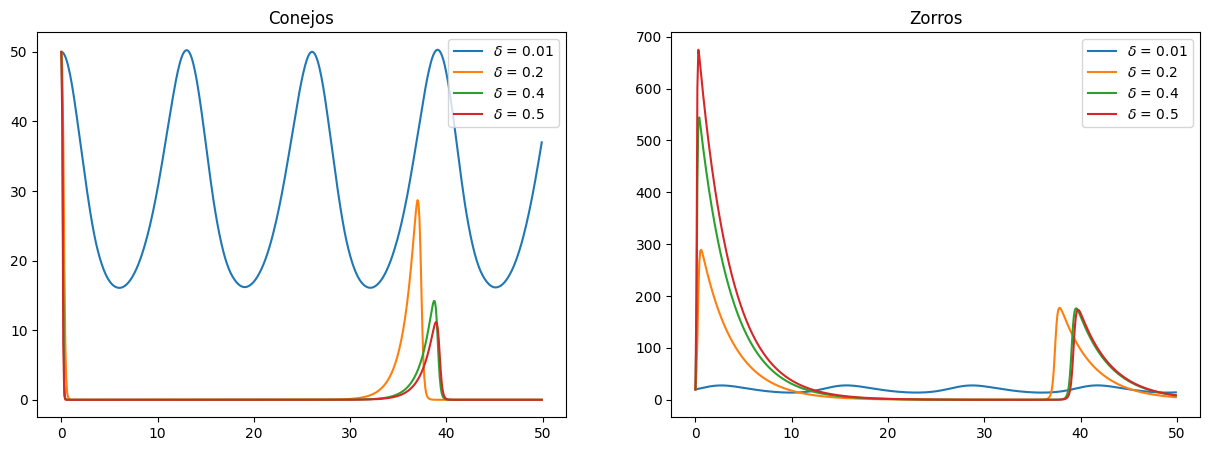

In [14]:
delta_values = np.array([0.01, 0.2, 0.4, 0.5])

t0, tf = 0, 50
P0 = np.array([50, 20])
h = 0.1

fig, ax = plt.subplots(1, 2, figsize= (15,5))

for delta in delta_values:

    sol_RK4 = solve_ivp(d_Poblacion, (t0, tf), P0, t_eval= np.arange(t0, tf, h))

    ax[0].set_title('Conejos')
    ax[0].plot(sol_RK4.t, sol_RK4.y[0], label= f'$\delta$ = {delta}')
    ax[0].legend()

    ax[1].set_title('Zorros')
    ax[1].plot(sol_RK4.t, sol_RK4.y[1], label= f'$\delta$ = {delta}')
    ax[1].legend()

# Problema 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


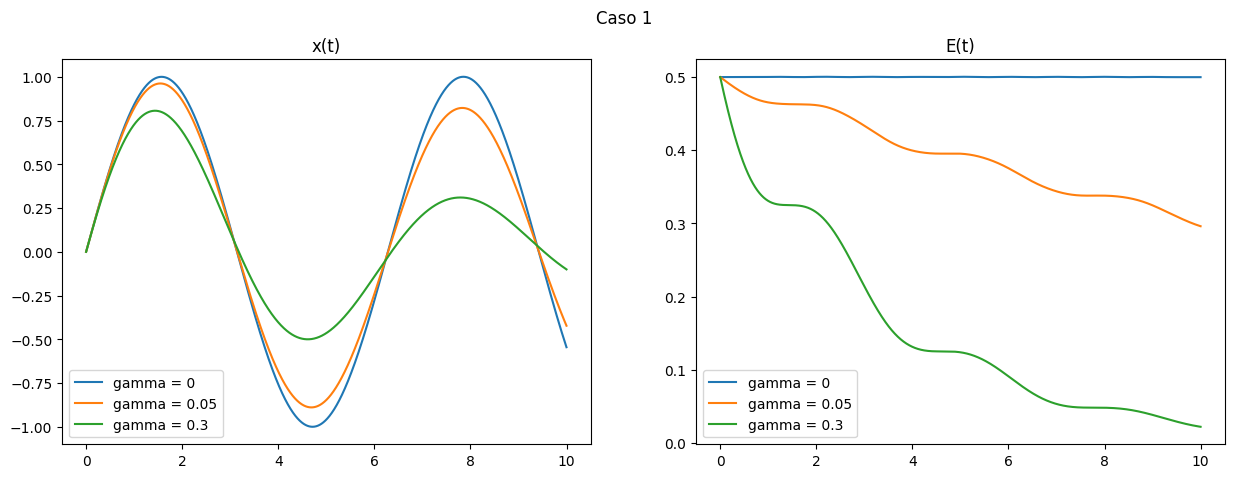

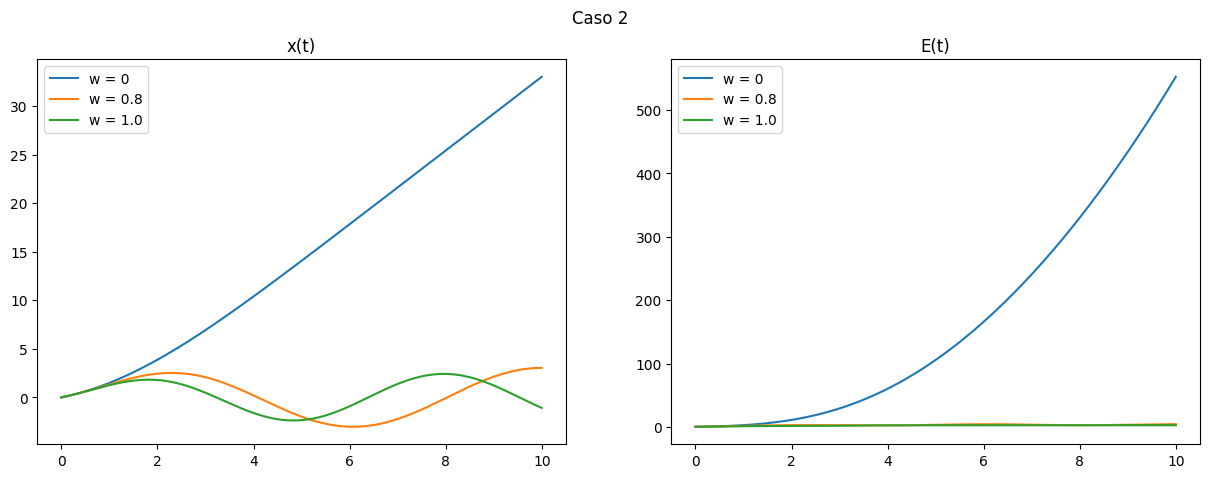

In [15]:
t0, tf = 0, 10
Y0 = np.array([0, 1])
h = 0.001

t_eval = np.arange(t0, tf, h)

m = 1
k = 1
w = np.sqrt(k/m)

#Caso 1
F = 0
gamma_values = [0, 0.05, 0.3]

E = lambda v, x: 1/2*m*v**2 + 1/2*k*x**2

fig, ax = plt.subplots(1, 2, figsize= (15, 5))

fig.suptitle('Caso 1')

def f(t, Y):
    dYdt = np.zeros_like(Y)

    x, v = Y[0], Y[1]

    dYdt[0] = v
    dYdt[1] = F/m - gamma*v - w**2 *x

    return dYdt

for gamma in gamma_values:

    sol = solve_ivp(f, (t0, tf), Y0, t_eval = t_eval)

    xt = sol.y[0]
    Et = E(sol.y[0], sol.y[1])
    t = sol.t

    ax[0].set_title('x(t)')
    ax[0].plot(t, xt, label= f'gamma = {gamma}')
    ax[0].legend()

    ax[1].set_title('E(t)')
    ax[1].plot(t, Et, label= f'gamma = {gamma}')
    ax[1].legend()

plt.show()

#Caso 2:
gamma = 0 
F0 = 1
T = 10
w_values = [0, 0.8*w, w]
F = lambda t, w:F0*np.cos(w*t)*np.exp(-t**2 / T)

fig, ax = plt.subplots(1, 2, figsize= (15, 5))

fig.suptitle('Caso 2')

def f(t, Y):
    dYdt = np.zeros_like(Y)

    x, v = Y[0], Y[1]

    dYdt[0] = v
    dYdt[1] = F(t, w)/m - gamma*v - w**2 *x

    return dYdt

for w in w_values:
    sol = solve_ivp(f, (t0, tf), Y0, t_eval= t_eval)

    xt = sol.y[0]
    Et = E(sol.y[0], sol.y[1])
    t = sol.t

    ax[0].set_title('x(t)')
    ax[0].plot(t, xt, label= f'w = {w}')
    ax[0].legend()

    ax[1].set_title('E(t)')
    ax[1].plot(t, Et, label= f'w = {w}')
    ax[1].legend()
